In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:

from tensorflow.keras.datasets import fashion_mnist

## 檢視資料

In [58]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Coat


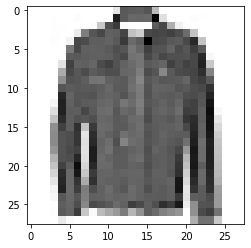

In [60]:
n = 878
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');


In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1) / 255

In [63]:
from tensorflow.keras.utils import to_categorical

In [64]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

## 設定cnn

In [66]:
model = Sequential()

In [67]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [68]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [69]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [70]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [71]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [72]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [73]:
model.add(Flatten())

In [74]:
model.add(Dense(54, activation='relu'))

In [75]:
model.add(Dense(10, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [77]:
# conv2d_2 (Conv2D):[3*3 (權重) + 1 (bias)]*32
(3*3+1)*32

320

In [81]:
# conv2d_2 (Conv2D):[3*3*16(權重) + 1 (bias)]*32
(3*3*16+1)*32

4640

In [80]:
# conv2d_3 (Conv2D):[3*3*32(權重) + 1 (bias)]*64
(3*3*32+1)*64

18496

## fit

In [82]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),
             metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 37s 621us/sample - loss: 0.0890 - acc: 0.2033
Epoch 2/12
60000/60000 [==============================] - 35s 585us/sample - loss: 0.0799 - acc: 0.4184
Epoch 3/12
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0502 - acc: 0.6319
Epoch 4/12
60000/60000 [==============================] - 35s 575us/sample - loss: 0.0414 - acc: 0.6974
Epoch 5/12
60000/60000 [==============================] - 35s 585us/sample - loss: 0.0372 - acc: 0.7321
Epoch 6/12
60000/60000 [==============================] - 36s 595us/sample - loss: 0.0345 - acc: 0.7529
Epoch 7/12
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0322 - acc: 0.7724
Epoch 8/12
60000/60000 [==============================] - 34s 573us/sample - loss: 0.0308 - acc: 0.7843
Epoch 9/12
60000/60000 [==============================] - 34s 569us/sample - loss: 0.0293 - acc: 0.7962
Epoch 10/12
60000/60000 [================

### 改變loss function 提升 learning rate 

In [85]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.810),
             metrics=['accuracy'])

In [86]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 570us/sample - loss: 8668.2155 - acc: 0.1009
Epoch 2/12
60000/60000 [==============================] - 34s 562us/sample - loss: 2.3041 - acc: 0.0996
Epoch 3/12
60000/60000 [==============================] - 34s 569us/sample - loss: 2.3041 - acc: 0.0997
Epoch 4/12
60000/60000 [==============================] - 34s 569us/sample - loss: 2.3042 - acc: 0.0989
Epoch 5/12
60000/60000 [==============================] - 34s 564us/sample - loss: 2.3039 - acc: 0.1023
Epoch 6/12
60000/60000 [==============================] - 34s 569us/sample - loss: 2.3041 - acc: 0.1002 - loss: 2.3041 - ac
Epoch 7/12
60000/60000 [==============================] - 34s 564us/sample - loss: 2.3042 - acc: 0.1004
Epoch 8/12
60000/60000 [==============================] - 33s 546us/sample - loss: 2.3042 - acc: 0.0973
Epoch 9/12
60000/60000 [==============================] - 32s 536us/sample - loss: 2.3042 - acc: 0.0981
Epoch 10/12
60000/

## 預測

In [87]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [88]:
result = model.predict_classes(x_test)

In [89]:
def CNN_predict(n):
    print("CNN的預測是：", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = "Greens")

CNN的預測是： Dress


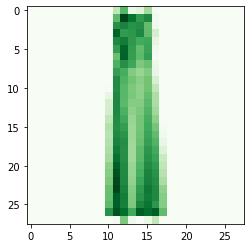

In [90]:
CNN_predict(878)


## 存model

In [91]:
model.save("myCNNmodel.h5")

## 修改與結論
調高learning rate: 0.087→0.81
改變loss function
但結果來看這樣調整沒有原來的好